In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy as sp
from scipy.signal import savgol_filter as sfilter

In [32]:
xls = pd.ExcelFile('Coefficienti_Hallikainen.xlsx', engine='openpyxl')

# Creazione del dataframe con i coefficienti di Hallikainen

In [33]:
Coeff = pd.read_excel(xls, 'Sheet1')
Coeff = pd.DataFrame(Coeff)
#Coeff_4GHz = Coeff.loc[Coeff['Frequency(GHz)']==4]
#Coeff_6GHz = Coeff.loc[Coeff['Frequency(GHz)']==6]

## Definizione costanti

In [34]:
c = 299792458
pi = 3.141592653589793
np.pi

3.141592653589793

# DoI plot
- $\gamma$ plots differ from signal % considered
- $\sigma_0$ plots have a width due to changing angle of view and sand percentage and differ by frequency of signal

In [35]:
from matplotlib.lines import Line2D

sand_range = np.arange(45, 46, 1) #vettore degli offset angoli
angle_range = np.arange(30, 44, 1)
SWC_range = [0.08, 0.12, 0.16, 0.20, 0.24, 0.28, 0.32, 0.36]
#SWC_range = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.15, 0.25, 0.35, 0.48]
grid = np.asarray(np.meshgrid(sand_range,angle_range)).T
init_shape = grid.shape
grid = grid.reshape(-1, 2)


a_vett_real_4GHz = [Coeff['a0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['a1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['a2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
a_vett_real_6GHz = [Coeff['a0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['a1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['a2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]
b_vett_real_4GHz = [Coeff['b0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['b1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['b2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
b_vett_real_6GHz = [Coeff['b0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['b1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['b2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]
c_vett_real_4GHz = [Coeff['c0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['c1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['c2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
c_vett_real_6GHz = [Coeff['c0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['c1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['c2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]

a_vett_imm_4GHz = [Coeff['a0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['a1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['a2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
a_vett_imm_6GHz = [Coeff['a0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['a1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['a2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]
b_vett_imm_4GHz = [Coeff['b0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['b1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['b2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
b_vett_imm_6GHz = [Coeff['b0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['b1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['b2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]
c_vett_imm_4GHz = [Coeff['c0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['c1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['c2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
c_vett_imm_6GHz = [Coeff['c0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['c1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['c2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]

In [36]:
# Colormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

reds = cm.get_cmap('Reds')
colorarray = (reds(np.linspace(0.2,1,20)))
colorarray =  map(tuple, colorarray)
colorarray = tuple(colorarray)
colorarray[14]

(0.7458208381391772, 0.08221453287197232, 0.10314494425221069, 1.0)

In [37]:
# Colormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

oranges = cm.get_cmap('Oranges')
colorarray1 = (oranges(np.linspace(0.2,1,20)))
colorarray1 =  map(tuple, colorarray1)
colorarray1 = tuple(colorarray1)
colorarray1[14]

(0.7835294117647058, 0.25854671280276814, 0.006566705113417916, 1.0)

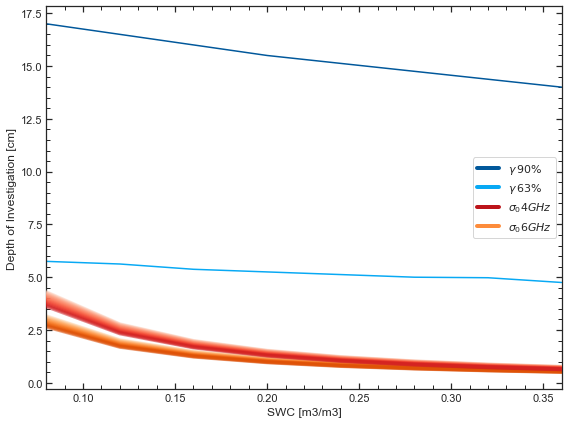

In [71]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
i = 0

for sand in sand_range:
    for angle in angle_range:
        
        DoIs_6 = []
        DoIs_4 = []
        
        for SWC in SWC_range:
            
            epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*15) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*15)*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*15)*(SWC**2)).values[0]
            epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*15) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*15)*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*15)*(SWC**2)).values[0]
            
            DoI_6 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(angle*0.0174533)
            DoIs_6.append(DoI_6)
            
            epsilon_real_4GHz = ((a_vett_real_4GHz[0] + a_vett_real_4GHz[1]*sand + a_vett_real_4GHz[2]*15) + (b_vett_real_4GHz[0] + b_vett_real_4GHz[1]*sand + b_vett_real_4GHz[2]*15)*SWC + (c_vett_real_4GHz[0] + c_vett_real_4GHz[1]*sand + c_vett_real_4GHz[2]*15)*(SWC**2)).values[0]
            epsilon_imm_4GHz = ((a_vett_imm_4GHz[0] + a_vett_imm_4GHz[1]*sand + a_vett_imm_4GHz[2]*15) + (b_vett_imm_4GHz[0] + b_vett_imm_4GHz[1]*sand + b_vett_imm_4GHz[2]*15)*SWC + (c_vett_imm_4GHz[0] + c_vett_imm_4GHz[1]*sand + c_vett_imm_4GHz[2]*15)*(SWC**2)).values[0]
            
            DoI_4 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(angle*0.0174533)
            DoIs_4.append(DoI_4)
            
        #DoIs = DoIs[~np.isnan(DoIs)]
        
        DoIs_6 = np.asarray(DoIs_6)
        DoIs_4 = np.asarray(DoIs_4)
        SWC_range = np.asarray(SWC_range)
        
        color = colorarray[i]
        color1 = colorarray1[i]
        i += 1
        #ax.scatter(SWC_range, DoIs, color = 'firebrick')
        ax.plot(SWC_range, DoIs_4*100, lw = 4, color = tuple(color), alpha = 0.5, zorder = 20)
        ax.plot(SWC_range, DoIs_6*100, lw = 4, color = tuple(color1), alpha = 0.5, zorder = 1)
                
xls = pd.ExcelFile('Depth_function_SWC.xlsx', engine='openpyxl')
data = pd.read_excel(xls, 'Sheet1')
data = pd.DataFrame(data)
#Depth = [data['Depth(cm)'].loc[data['SWC_0']==95.01814], data['Depth(cm)'].loc[data['SWC_0.05']==95.056521], data['Depth(cm)'].loc[data['SWC_0.1']==95.030322], data['Depth(cm)'].loc[data['SWC_0.15']==95.007266], data['Depth(cm)'].loc[data['SWC_0.2']==95.068372], data['Depth(cm)'].loc[data['SWC_0.25']==95.009932], data['Depth(cm)'].loc[data['SWC_0.3']==95.054977], data['Depth(cm)'].loc[data['SWC_0.36']==95.073978]]
#Depth_array = [Depth[0], Depth[1], Depth[2], Depth[3], Depth[4], Depth[5], Depth[6], Depth[7]]
#SWC_array = np.asarray(SWC_range)
#Depth = [0.18125, 0.17375, 0.1675, 0.16125, 0.155, 0.15, 0.145, 0.14, 0.13625, 0.13]
Depth_63 = [5.75, 5.625, 5.375, 5.25, 5.125, 5, 4.975, 4.75]
Depth_90 = [17, 16.5, 16, 15.5, 15.125, 14.75, 14.375, 14]

#ax.scatter(SWC_range, Depth_63, color = 'darkblue')
ax.plot(SWC_range, Depth_63, color = '#08A9F4')

#ax.scatter(SWC_range, Depth_90, color = 'darkorange')
ax.plot(SWC_range, Depth_90, color = '#01589B')

ax.set_xlabel('SWC [m3/m3]')
ax.set_ylabel('Depth of Investigation [cm]')
#ax.set_ylim(0,0.16)
ax.set_xlim(0.08,0.36)

custom_lines = [Line2D([0], [0], color='#01589B', lw=4),
                Line2D([0], [0], color='#08A9F4', lw=4),
                Line2D([0], [0], color=reds(0.8), lw=4),
                Line2D([0], [0], color=oranges(0.5), lw=4)]
                #Line2D([0], [0], color=tuple(colorarray[5]), lw=4),
                #Line2D([0], [0], color=tuple(colorarray[14]), lw=4)]

ax.legend(custom_lines, [r'$\gamma\,90\%$', r'$\gamma\,63\%$', r'$\sigma_04GHz$', r'$\sigma_06GHz$'])#, r'$\gamma\,90\%$'])
#ax.legend()

fig.tight_layout()
# fig.savefig(f'Out_DoI/DoI_vs_SWC_GammaSat_90vs63_noscatter.png', dpi = 300)

In [70]:
len(colorarray1)

20

# Tessitura di Budrio

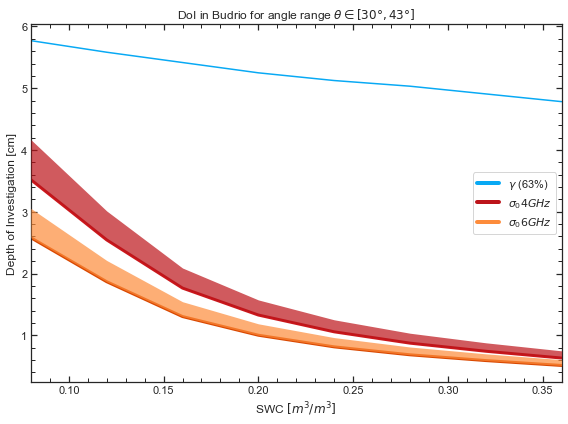

In [82]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
i = 0

DoIs_6_30 = []
DoIs_4_30 = []
DoIs_6_43 = []
DoIs_4_43 = []
    
for SWC in SWC_range:
        
    epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*45 + a_vett_real_6GHz[2]*15) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*45 + b_vett_real_6GHz[2]*15)*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*45 + c_vett_real_6GHz[2]*15)*(SWC**2)).values[0]
    epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*45 + a_vett_imm_6GHz[2]*15) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*45 + b_vett_imm_6GHz[2]*15)*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*45 + c_vett_imm_6GHz[2]*15)*(SWC**2)).values[0]
    
    DoI_6_30 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(30*0.0174533)
    DoI_6_43 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(43*0.0174533)
    DoIs_6_30.append(DoI_6_30)
    DoIs_6_43.append(DoI_6_43)
    
    epsilon_real_4GHz = ((a_vett_real_4GHz[0] + a_vett_real_4GHz[1]*45 + a_vett_real_4GHz[2]*15) + (b_vett_real_4GHz[0] + b_vett_real_4GHz[1]*45 + b_vett_real_4GHz[2]*15)*SWC + (c_vett_real_4GHz[0] + c_vett_real_4GHz[1]*45 + c_vett_real_4GHz[2]*15)*(SWC**2)).values[0]
    epsilon_imm_4GHz = ((a_vett_imm_4GHz[0] + a_vett_imm_4GHz[1]*45 + a_vett_imm_4GHz[2]*15) + (b_vett_imm_4GHz[0] + b_vett_imm_4GHz[1]*45 + b_vett_imm_4GHz[2]*15)*SWC + (c_vett_imm_4GHz[0] + c_vett_imm_4GHz[1]*45 + c_vett_imm_4GHz[2]*15)*(SWC**2)).values[0]
    
    DoI_4_30 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(30*0.0174533)
    DoI_4_43 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(43*0.0174533)
    DoIs_4_30.append(DoI_4_30)
    DoIs_4_43.append(DoI_4_43)
        
    #DoIs = DoIs[~np.isnan(DoIs)]
    
DoIs_6_30 = np.asarray(DoIs_6_30)
DoIs_4_30 = np.asarray(DoIs_4_30)
DoIs_6_43 = np.asarray(DoIs_6_43)
DoIs_4_43 = np.asarray(DoIs_4_43)
SWC_range = np.asarray(SWC_range)
    
#    color = colorarray[i]
#    color1 = colorarray1[i]
#    i += 1
#    #ax.scatter(SWC_range, DoIs, color = 'firebrick')

# Plotting 30° and 43° lines and coloring between them
ax.plot(SWC_range, sfilter(DoIs_4_30*100,window_length=3,polyorder=1), lw = 0, alpha = 0.5, zorder = 2, color = tuple(color)) 
ax.plot(SWC_range, sfilter(DoIs_6_30*100,window_length=3,polyorder=1), lw = 0,  alpha = 0.5, zorder = 1, color = tuple(color1))
ax.plot(SWC_range, sfilter(DoIs_4_43*100,window_length=3,polyorder=1), lw = 3, alpha = 1, zorder = 2, color = tuple(color))
ax.plot(SWC_range, sfilter(DoIs_6_43*100,window_length=3,polyorder=1), lw = 3,  alpha = 1, zorder = 1, color = tuple(color1),)
x = SWC_range
ax.fill_between(x, sfilter(DoIs_4_30*100,window_length=3,polyorder=1), sfilter(DoIs_4_43*100,window_length=3,polyorder=1), where=(DoIs_4_30 > DoIs_4_43), lw = 0, color = reds(0.8), alpha = 0.7, interpolate = True, zorder = 4)
ax.fill_between(x, sfilter(DoIs_6_30*100,window_length=3,polyorder=1), sfilter(DoIs_6_43*100,window_length=3,polyorder=1), where=(DoIs_6_30 > DoIs_6_43), lw = 0, color = oranges(0.5), alpha = 0.7, interpolate = True, zorder = 4)
      
        
xls = pd.ExcelFile('Depth_function_SWC.xlsx', engine='openpyxl')
data = pd.read_excel(xls, 'Sheet1')
data = pd.DataFrame(data)
#Depth = [data['Depth(cm)'].loc[data['SWC_0']==95.01814], data['Depth(cm)'].loc[data['SWC_0.05']==95.056521], data['Depth(cm)'].loc[data['SWC_0.1']==95.030322], data['Depth(cm)'].loc[data['SWC_0.15']==95.007266], data['Depth(cm)'].loc[data['SWC_0.2']==95.068372], data['Depth(cm)'].loc[data['SWC_0.25']==95.009932], data['Depth(cm)'].loc[data['SWC_0.3']==95.054977], data['Depth(cm)'].loc[data['SWC_0.36']==95.073978]]
#Depth_array = [Depth[0], Depth[1], Depth[2], Depth[3], Depth[4], Depth[5], Depth[6], Depth[7]]
#SWC_array = np.asarray(SWC_range)
#Depth = [0.18125, 0.17375, 0.1675, 0.16125, 0.155, 0.15, 0.145, 0.14, 0.13625, 0.13]
Depth_63 = [5.75, 5.625, 5.375, 5.25, 5.125, 5, 4.975, 4.75]
Depth_90 = [17, 16.5, 16, 15.5, 15.125, 14.75, 14.375, 14]

#ax.scatter(SWC_range, Depth_63, color = 'darkblue')
ax.plot(SWC_range, sfilter(Depth_63,window_length=3,polyorder=1), color = '#08A9F4')

#ax.scatter(SWC_range, Depth_90, color = 'darkorange')
#ax.plot(SWC_range, Depth_90, color = '#01589B')

#SWC_gorrab = [0.071141, 0.12217, 0.155189, 0.238636, 0.252444, 0.299571]
#sigma_gorrab = [5.2657, 3.1351, 2.677, 1.8065, 1.375, 0.9974]

#ax.scatter(SWC_gorrab, sigma_gorrab, color = '#757575')

ax.set_xlabel('SWC $[m^3/m^3]$')
ax.set_ylabel('Depth of Investigation [cm]')
#ax.set_ylim(0,0.16)
ax.set_xlim(0.08,0.36)


custom_lines = [Line2D([0], [0], color='#08A9F4', lw=4), #Line2D([0], [0], color='#01589B', lw=4),
                #Line2D([0], [0], marker='o', color='#757575', lw=0),
                Line2D([0], [0], color=reds(0.8), lw=4),
                Line2D([0], [0], color=oranges(0.5), lw=4)]
                #Line2D([0], [0], color=tuple(colorarray[5]), lw=4),
                #Line2D([0], [0], color=tuple(colorarray[14]), lw=4)]

ax.legend(custom_lines, [r'$\gamma$ (63%)', r'$\sigma_04GHz$', r'$\sigma_06GHz$'], loc = 'center right')#, r'$\gamma\,90\%$', r'$\sigma_0\,$Gorrab 2014', ])
ax.set_title(r'DoI in Budrio for angle range $\theta \in [30°,43°]$')
#ax.legend()

fig.tight_layout()
fig.savefig(f'DoI_vs_SWC_GammaSat_noscatter_bands.pdf', dpi = 300)

# Tessitura da Gorrab_2014

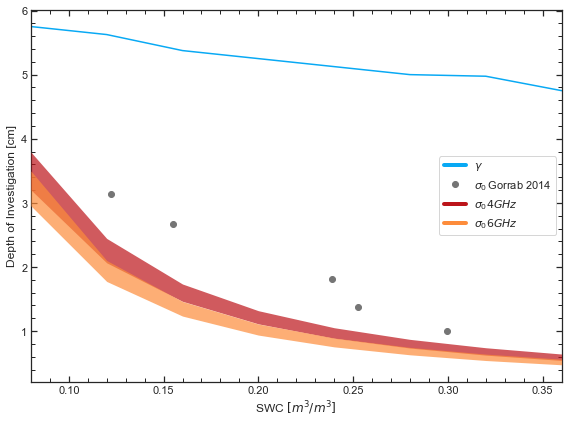

In [12]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
i = 0

DoIs_6_30 = []
DoIs_4_30 = []
DoIs_6_43 = []
DoIs_4_43 = []

sand = 30
clay = 40
    
for SWC in SWC_range:
        
    epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*clay) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*clay)*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*clay)*(SWC**2)).values[0]
    epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*clay) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*clay)*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*clay)*(SWC**2)).values[0]
    
    DoI_6_30 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(30*0.0174533)
    DoI_6_43 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(43*0.0174533)
    DoIs_6_30.append(DoI_6_30)
    DoIs_6_43.append(DoI_6_43)
    
    epsilon_real_4GHz = ((a_vett_real_4GHz[0] + a_vett_real_4GHz[1]*sand + a_vett_real_4GHz[2]*clay) + (b_vett_real_4GHz[0] + b_vett_real_4GHz[1]*sand + b_vett_real_4GHz[2]*clay)*SWC + (c_vett_real_4GHz[0] + c_vett_real_4GHz[1]*sand + c_vett_real_4GHz[2]*clay)*(SWC**2)).values[0]
    epsilon_imm_4GHz = ((a_vett_imm_4GHz[0] + a_vett_imm_4GHz[1]*sand + a_vett_imm_4GHz[2]*clay) + (b_vett_imm_4GHz[0] + b_vett_imm_4GHz[1]*sand + b_vett_imm_4GHz[2]*clay)*SWC + (c_vett_imm_4GHz[0] + c_vett_imm_4GHz[1]*sand + c_vett_imm_4GHz[2]*clay)*(SWC**2)).values[0]
    
    DoI_4_30 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(30*0.0174533)
    DoI_4_43 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(43*0.0174533)
    DoIs_4_30.append(DoI_4_30)
    DoIs_4_43.append(DoI_4_43)
        
    #DoIs = DoIs[~np.isnan(DoIs)]
    
DoIs_6_30 = np.asarray(DoIs_6_30)
DoIs_4_30 = np.asarray(DoIs_4_30)
DoIs_6_43 = np.asarray(DoIs_6_43)
DoIs_4_43 = np.asarray(DoIs_4_43)
SWC_range = np.asarray(SWC_range)
    
#    color = colorarray[i]
#    color1 = colorarray1[i]
#    i += 1
#    #ax.scatter(SWC_range, DoIs, color = 'firebrick')

# Plotting 30° and 43° lines and coloring between them
ax.plot(SWC_range, DoIs_4_30*100, lw = 0, alpha = 0.8, zorder = 2) #color = tuple(color), 
ax.plot(SWC_range, DoIs_6_30*100, lw = 0,  alpha = 0.8, zorder = 1) #color = tuple(color1),
ax.plot(SWC_range, DoIs_4_43*100, lw = 0, alpha = 0.8, zorder = 2) #color = tuple(color), 
ax.plot(SWC_range, DoIs_6_43*100, lw = 0,  alpha = 0.8, zorder = 1) #color = tuple(color1),
x = SWC_range
ax.fill_between(x, DoIs_4_30*100, DoIs_4_43*100, where=(DoIs_4_30 > DoIs_4_43), lw = 0, color = reds(0.8), alpha = 0.7, interpolate = True, zorder = 4)
ax.fill_between(x, DoIs_6_30*100, DoIs_6_43*100, where=(DoIs_6_30 > DoIs_6_43), lw = 0, color = oranges(0.5), alpha = 0.7, interpolate = True, zorder = 4)
      
        
xls = pd.ExcelFile('Depth_function_SWC.xlsx', engine='openpyxl')
data = pd.read_excel(xls, 'Sheet1')
data = pd.DataFrame(data)
#Depth = [data['Depth(cm)'].loc[data['SWC_0']==95.01814], data['Depth(cm)'].loc[data['SWC_0.05']==95.056521], data['Depth(cm)'].loc[data['SWC_0.1']==95.030322], data['Depth(cm)'].loc[data['SWC_0.15']==95.007266], data['Depth(cm)'].loc[data['SWC_0.2']==95.068372], data['Depth(cm)'].loc[data['SWC_0.25']==95.009932], data['Depth(cm)'].loc[data['SWC_0.3']==95.054977], data['Depth(cm)'].loc[data['SWC_0.36']==95.073978]]
#Depth_array = [Depth[0], Depth[1], Depth[2], Depth[3], Depth[4], Depth[5], Depth[6], Depth[7]]
#SWC_array = np.asarray(SWC_range)
#Depth = [0.18125, 0.17375, 0.1675, 0.16125, 0.155, 0.15, 0.145, 0.14, 0.13625, 0.13]
Depth_63 = [5.75, 5.625, 5.375, 5.25, 5.125, 5, 4.975, 4.75]
Depth_90 = [17, 16.5, 16, 15.5, 15.125, 14.75, 14.375, 14]

#ax.scatter(SWC_range, Depth_63, color = 'darkblue')
ax.plot(SWC_range, Depth_63, color = '#08A9F4')

#ax.scatter(SWC_range, Depth_90, color = 'darkorange')
#ax.plot(SWC_range, Depth_90, color = '#01589B')

SWC_gorrab = [0.071141, 0.12217, 0.155189, 0.238636, 0.252444, 0.299571]
sigma_gorrab = [5.2657, 3.1351, 2.677, 1.8065, 1.375, 0.9974]

ax.scatter(SWC_gorrab, sigma_gorrab, color = '#757575')

ax.set_xlabel('SWC $[m^3/m^3]$')
ax.set_ylabel('Depth of Investigation [cm]')
#ax.set_ylim(0,0.16)
ax.set_xlim(0.08,0.36)


custom_lines = [Line2D([0], [0], color='#08A9F4', lw=4), #Line2D([0], [0], color='#01589B', lw=4),
                Line2D([0], [0], marker='o', color='#757575', lw=0),
                Line2D([0], [0], color=reds(0.8), lw=4),
                Line2D([0], [0], color=oranges(0.5), lw=4)]
                #Line2D([0], [0], color=tuple(colorarray[5]), lw=4),
                #Line2D([0], [0], color=tuple(colorarray[14]), lw=4)]

ax.legend(custom_lines, [r'$\gamma$', r'$\sigma_0\,$Gorrab 2014', r'$\sigma_04GHz$', r'$\sigma_06GHz$'], loc = 'center right')#, r'$\gamma\,90\%$'])
#ax.legend()

fig.tight_layout()
# fig.savefig(f'Out_DoI/DoI_vs_SWC_GammaSat_Gorrab.png', dpi = 300)

# Punti e tessitura Singh_2018

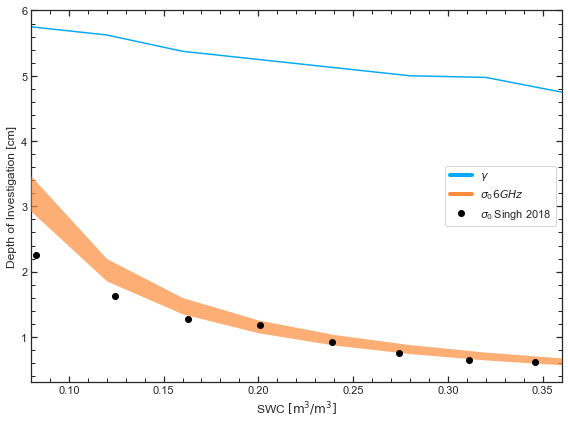

In [13]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
i = 0

DoIs_6_30 = []
DoIs_4_30 = []
DoIs_6_43 = []
DoIs_4_43 = []

DoIs_6_0 = []

sand = 7
clay = 31
    
for SWC in SWC_range:
        
    epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*clay) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*clay)*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*clay)*(SWC**2)).values[0]
    epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*clay) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*clay)*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*clay)*(SWC**2)).values[0]
    
    DoI_6_30 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(30*0.0174533)
    DoI_6_43 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(43*0.0174533)
    DoI_6_0 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)
    DoIs_6_30.append(DoI_6_30)
    DoIs_6_43.append(DoI_6_43)
    DoIs_6_0.append(DoI_6_0)
    
    epsilon_real_4GHz = ((a_vett_real_4GHz[0] + a_vett_real_4GHz[1]*sand + a_vett_real_4GHz[2]*clay) + (b_vett_real_4GHz[0] + b_vett_real_4GHz[1]*sand + b_vett_real_4GHz[2]*clay)*SWC + (c_vett_real_4GHz[0] + c_vett_real_4GHz[1]*sand + c_vett_real_4GHz[2]*clay)*(SWC**2)).values[0]
    epsilon_imm_4GHz = ((a_vett_imm_4GHz[0] + a_vett_imm_4GHz[1]*sand + a_vett_imm_4GHz[2]*clay) + (b_vett_imm_4GHz[0] + b_vett_imm_4GHz[1]*sand + b_vett_imm_4GHz[2]*clay)*SWC + (c_vett_imm_4GHz[0] + c_vett_imm_4GHz[1]*sand + c_vett_imm_4GHz[2]*clay)*(SWC**2)).values[0]
    
    DoI_4_30 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(30*0.0174533)
    DoI_4_43 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(43*0.0174533)
    DoIs_4_30.append(DoI_4_30)
    DoIs_4_43.append(DoI_4_43)
        
    #DoIs = DoIs[~np.isnan(DoIs)]
    
DoIs_6_30 = np.asarray(DoIs_6_30)
DoIs_4_30 = np.asarray(DoIs_4_30)
DoIs_6_43 = np.asarray(DoIs_6_43)
DoIs_4_43 = np.asarray(DoIs_4_43)
SWC_range = np.asarray(SWC_range)

DoIs_6_0 = np.asarray(DoIs_6_0)
    
#    color = colorarray[i]
#    color1 = colorarray1[i]
#    i += 1
#    #ax.scatter(SWC_range, DoIs, color = 'firebrick')

# Plotting 30° and 43° lines and coloring between them
#ax.plot(SWC_range, DoIs_4_30*100, lw = 0, alpha = 0.8, zorder = 2) #color = tuple(color), 
ax.plot(SWC_range, DoIs_6_30*100, lw = 0,  alpha = 0.8, zorder = 1) #color = tuple(color1),
#ax.plot(SWC_range, DoIs_4_43*100, lw = 0, alpha = 0.8, zorder = 2) #color = tuple(color), 
ax.plot(SWC_range, DoIs_6_43*100, lw = 0,  alpha = 0.8, zorder = 1) #color = tuple(color1),
x = SWC_range
#ax.fill_between(x, DoIs_4_30*100, DoIs_4_43*100, where=(DoIs_4_30 > DoIs_4_43), lw = 0, color = reds(0.8), alpha = 0.7, interpolate = True, zorder = 4)
ax.fill_between(x, DoIs_6_30*100, DoIs_6_43*100, where=(DoIs_6_30 > DoIs_6_43), lw = 0, color = oranges(0.5), alpha = 0.7, interpolate = True, zorder = 4)
      
#ax.plot(SWC_range, DoIs_6_0*100, color = '#009688')


xls = pd.ExcelFile('Depth_function_SWC.xlsx', engine='openpyxl')
data = pd.read_excel(xls, 'Sheet1')
data = pd.DataFrame(data)
#Depth = [data['Depth(cm)'].loc[data['SWC_0']==95.01814], data['Depth(cm)'].loc[data['SWC_0.05']==95.056521], data['Depth(cm)'].loc[data['SWC_0.1']==95.030322], data['Depth(cm)'].loc[data['SWC_0.15']==95.007266], data['Depth(cm)'].loc[data['SWC_0.2']==95.068372], data['Depth(cm)'].loc[data['SWC_0.25']==95.009932], data['Depth(cm)'].loc[data['SWC_0.3']==95.054977], data['Depth(cm)'].loc[data['SWC_0.36']==95.073978]]
#Depth_array = [Depth[0], Depth[1], Depth[2], Depth[3], Depth[4], Depth[5], Depth[6], Depth[7]]
#SWC_array = np.asarray(SWC_range)
#Depth = [0.18125, 0.17375, 0.1675, 0.16125, 0.155, 0.15, 0.145, 0.14, 0.13625, 0.13]
Depth_63 = [5.75, 5.625, 5.375, 5.25, 5.125, 5, 4.975, 4.75]
Depth_90 = [17, 16.5, 16, 15.5, 15.125, 14.75, 14.375, 14]

#ax.scatter(SWC_range, Depth_63, color = 'darkblue')
ax.plot(SWC_range, Depth_63, color = '#08A9F4')

#ax.scatter(SWC_range, Depth_90, color = 'darkorange')
#ax.plot(SWC_range, Depth_90, color = '#01589B')

SWC_singh = [0.087279, 0.111457, 0.140944, 0.167481, 0.187532, 0.211415, 0.235299, 0.267439, 0.306655, 0.348231]
sigma_singh = [2.133, 1.947, 1.764, 1.388, 1.297, 1.112, 0.927, 0.84, 0.659, 0.67]

SWC_singh_2 = [0.030425, 0.082667, 0.124507, 0.162726, 0.200804, 0.238605, 0.274222, 0.31114, 0.346201]
sigma_singh_2 = [3.388, 2.255, 1.633, 1.281, 1.186, 0.924, 0.753, 0.642, 0.622]

#ax.scatter(SWC_singh, sigma_singh, color = '#512DA8')
ax.scatter(SWC_singh_2, sigma_singh_2, color = 'black', zorder=100)

ax.set_xlabel('SWC $\mathrm{[m^3/m^3]}$')
ax.set_ylabel('Depth of Investigation [cm]')
#ax.set_ylim(0,0.16)
ax.set_xlim(0.08,0.36)


custom_lines = [Line2D([0], [0], color='#08A9F4', lw=4), #Line2D([0], [0], color='#01589B', lw=4),
                #Line2D([0], [0], color=reds(0.8), lw=4),
                Line2D([0], [0], color=oranges(0.5), lw=4),
               Line2D([0], [0], marker='o', color='black', lw=0)]
                #Line2D([0], [0], color=tuple(colorarray[5]), lw=4),
                #Line2D([0], [0], color=tuple(colorarray[14]), lw=4)]

ax.legend(custom_lines, [r'$\gamma$', r'$\sigma_06GHz$', r'$\sigma_0\,$Singh 2018'], loc = 'center right')#, r'$\gamma\,90\%$' , r'$\sigma_04GHz$'])
#ax.legend()

fig.tight_layout()
# fig.savefig(f'Out_DoI/DoI_vs_SWC_GammaSat_Singh_no4GHz.png', dpi = 300)

# Cicli solo su tessitura o solo su angolo (da modificare ogni volta)

## Making a nice transition of colors using colormaps magic

What we have:

- a damn for cycle for plotting

What we need:

- choose a colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
- access a sigle color of the colormap by a RGB tuple, as described here: https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
- count how many lines you have to plot --> create array of numbers between 0 and 1 with as many points as the number of lines that you want

In [15]:
sand_range = np.arange(0, 1, 1) #1 line
angle_range = np.arange(30, 44, 1) #13 lines
#SWC_range = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.48]
SWC_range = np.linspace(0.08,0.37, num = 100)
grid = np.asarray(np.meshgrid(sand_range,angle_range)).T
init_shape = grid.shape
grid = grid.reshape(-1, 2)

a_vett_real_4GHz = [Coeff['a0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['a1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['a2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
a_vett_real_6GHz = [Coeff['a0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['a1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['a2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]
b_vett_real_4GHz = [Coeff['b0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['b1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['b2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
b_vett_real_6GHz = [Coeff['b0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['b1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['b2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]
c_vett_real_4GHz = [Coeff['c0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['c1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['c2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
c_vett_real_6GHz = [Coeff['c0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['c1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['c2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]

a_vett_imm_4GHz = [Coeff['a0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['a1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['a2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
a_vett_imm_6GHz = [Coeff['a0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['a1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['a2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]
b_vett_imm_4GHz = [Coeff['b0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['b1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['b2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
b_vett_imm_6GHz = [Coeff['b0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['b1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['b2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]
c_vett_imm_4GHz = [Coeff['c0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['c1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['c2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
c_vett_imm_6GHz = [Coeff['c0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['c1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['c2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]

In [16]:
# Colormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

reds = cm.get_cmap('Reds')
colorarray = (reds(np.linspace(0.4,1,15)))
colorarray =  map(tuple, colorarray)
colorarray = tuple(colorarray)
colorarray[14]

(0.403921568627451, 0.0, 0.05098039215686274, 1.0)

In [17]:
# Colormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

oranges = cm.get_cmap('Oranges')
colorarray1 = (oranges(np.linspace(0.2,0.9,15)))
colorarray1 =  map(tuple, colorarray1)
colorarray1 = tuple(colorarray1)
colorarray1[14]

(0.6179930795847751, 0.19907727797001154, 0.012610534409842366, 1.0)

### 100% silt

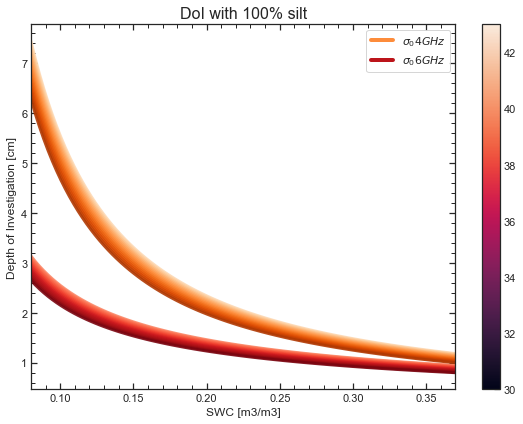

In [18]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
i = 0

for sand in sand_range:
    for angle in angle_range:
        
        DoIs_6 = []
        DoIs_4 = []
        
        for SWC in SWC_range:
            
            #da 100% sabbia a 100% argilla
            #epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*(100-sand)) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*(100-sand))*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*(100-sand))*(SWC**2)).values[0]
            #epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*(100-sand)) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*(100-sand))*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*(100-sand))*(SWC**2)).values[0]
            
            #100% limo
            epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*0) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*0)*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*0)*(SWC**2)).values[0]
            epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*0) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*0)*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*0)*(SWC**2)).values[0]
            
            DoI_6 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(angle*0.0174533)
            DoIs_6.append(DoI_6)
            
            epsilon_real_4GHz = ((a_vett_real_4GHz[0] + a_vett_real_4GHz[1]*sand + a_vett_real_4GHz[2]*0) + (b_vett_real_4GHz[0] + b_vett_real_4GHz[1]*sand + b_vett_real_4GHz[2]*0)*SWC + (c_vett_real_4GHz[0] + c_vett_real_4GHz[1]*sand + c_vett_real_4GHz[2]*0)*(SWC**2)).values[0]
            epsilon_imm_4GHz = ((a_vett_imm_4GHz[0] + a_vett_imm_4GHz[1]*sand + a_vett_imm_4GHz[2]*0) + (b_vett_imm_4GHz[0] + b_vett_imm_4GHz[1]*sand + b_vett_imm_4GHz[2]*0)*SWC + (c_vett_imm_4GHz[0] + c_vett_imm_4GHz[1]*sand + c_vett_imm_4GHz[2]*0)*(SWC**2)).values[0]
            
            DoI_4 = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_4GHz)/epsilon_imm_4GHz)*np.cos(angle*0.0174533)
            DoIs_4.append(DoI_4)
            
        #DoIs = DoIs[~np.isnan(DoIs)]
        
        DoIs_6 = np.asarray(DoIs_6)
        DoIs_4 = np.asarray(DoIs_4)        
        SWC_range = np.asarray(SWC_range)
        
        color = colorarray[i] #reds
        color1 = colorarray1[i] #oranges
        i += 1
        #ax.scatter(SWC_range, DoIs)
        Hz6 = ax.plot(SWC_range, DoIs_6*100, color = tuple(color), alpha = 0.9, zorder = 1, lw = 3)
        Hz4 = ax.plot(SWC_range, DoIs_4*100, color = tuple(color1), alpha = 0.9, zorder = 2, lw = 3)
       
custom_lines = [Line2D([0], [0], color=oranges(0.5), lw=4), Line2D([0], [0], color=reds(0.8), lw=4)]
                #Line2D([0], [0], color=tuple(colorarray[5]), lw=4),
                #Line2D([0], [0], color=tuple(colorarray[14]), lw=4)]

ax.legend(custom_lines, [r'$\sigma_04GHz$', r'$\sigma_06GHz$'])#, r'$\gamma\,90\%$'])

ax.set_xlabel('SWC [m3/m3]')
ax.set_ylabel('Depth of Investigation [cm]')
bar = fig.colorbar(cm.ScalarMappable(norm = plt.Normalize(vmin = 30, vmax = 43)), cmap='Oranges')
#bar.ax.colorbar(bar)
#bar.set_yticklabels(['30','31','32','33','34','35','36','37','38','39','40','41','42'])#angle_range.astype(str))
#bar.ax.set_title(r'angle')
#ax.set_ylim(0,10.0)
ax.set_xlim(0.08,0.37)
ax.set_title('DoI with 100% silt', fontsize = 16)
fig.tight_layout()
# fig.savefig(f'Out_DoI/DoI_vs_SWC_100L.png', dpi = 300)

In [19]:
angle_range.astype(str)

array(['30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43'], dtype='<U11')

In [20]:
sand_range

array([0])

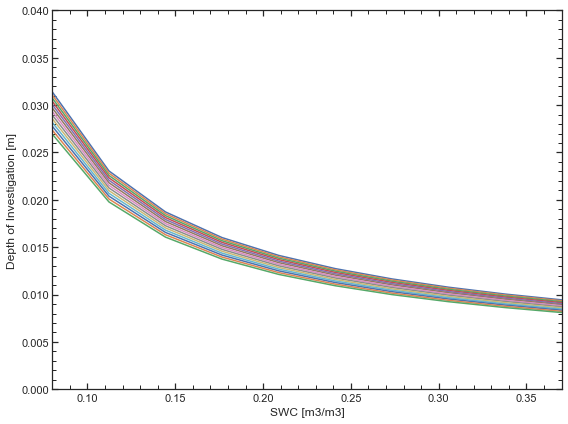

In [22]:
sand_range = np.arange(0, 1, 1) #1 line
angle_range = np.arange(30, 43, 1) #13 lines
#SWC_range = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.48]
SWC_range = np.linspace(0.08,0.37, num = 10)
grid = np.asarray(np.meshgrid(sand_range,angle_range)).T
init_shape = grid.shape
grid = grid.reshape(-1, 2)


a_vett_real_4GHz = [Coeff['a0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['a1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['a2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
a_vett_real_6GHz = [Coeff['a0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['a1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['a2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]
b_vett_real_4GHz = [Coeff['b0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['b1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['b2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
b_vett_real_6GHz = [Coeff['b0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['b1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['b2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]
c_vett_real_4GHz = [Coeff['c0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['c1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)], Coeff['c2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==4)]]
c_vett_real_6GHz = [Coeff['c0'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['c1'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)], Coeff['c2'].loc[(Coeff['ID']==0) & (Coeff['Frequency(GHz)']==6)]]

a_vett_imm_4GHz = [Coeff['a0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['a1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['a2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
a_vett_imm_6GHz = [Coeff['a0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['a1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['a2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]
b_vett_imm_4GHz = [Coeff['b0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['b1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['b2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
b_vett_imm_6GHz = [Coeff['b0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['b1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['b2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]
c_vett_imm_4GHz = [Coeff['c0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['c1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)], Coeff['c2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==4)]]
c_vett_imm_6GHz = [Coeff['c0'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['c1'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)], Coeff['c2'].loc[(Coeff['ID']==1) & (Coeff['Frequency(GHz)']==6)]]


# Per il momento lo sto facendo soltanto a 6GHz


fig, ax = plt.subplots(1,1,figsize = (8,6))

for sand in sand_range:
    for angle in angle_range:
        
        DoIs = []
        
        for SWC in SWC_range:
            
            #da 100% sabbia a 100% argilla
            #epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*(100-sand)) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*(100-sand))*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*(100-sand))*(SWC**2)).values[0]
            #epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*(100-sand)) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*(100-sand))*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*(100-sand))*(SWC**2)).values[0]
            
            #100% limo
            epsilon_real_6GHz = ((a_vett_real_6GHz[0] + a_vett_real_6GHz[1]*sand + a_vett_real_6GHz[2]*0) + (b_vett_real_6GHz[0] + b_vett_real_6GHz[1]*sand + b_vett_real_6GHz[2]*0)*SWC + (c_vett_real_6GHz[0] + c_vett_real_6GHz[1]*sand + c_vett_real_6GHz[2]*0)*(SWC**2)).values[0]
            epsilon_imm_6GHz = ((a_vett_imm_6GHz[0] + a_vett_imm_6GHz[1]*sand + a_vett_imm_6GHz[2]*0) + (b_vett_imm_6GHz[0] + b_vett_imm_6GHz[1]*sand + b_vett_imm_6GHz[2]*0)*SWC + (c_vett_imm_6GHz[0] + c_vett_imm_6GHz[1]*sand + c_vett_imm_6GHz[2]*0)*(SWC**2)).values[0]
            
            DoI = ((c/(6*(10**9)))/(2*pi))*(np.sqrt(epsilon_real_6GHz)/epsilon_imm_6GHz)*np.cos(angle*0.0174533)
            DoIs.append(DoI)
            
        #DoIs = DoIs[~np.isnan(DoIs)]
        
        DoIs = np.asarray(DoIs)
        SWC_range = np.asarray(SWC_range)
        
        
        #ax.scatter(SWC_range, DoIs)
        ax.plot(SWC_range, DoIs)
    


ax.set_xlabel('SWC [m3/m3]')
ax.set_ylabel('Depth of Investigation [m]')
ax.set_ylim(0,0.04)
ax.set_xlim(0.08,0.37)
fig.tight_layout()
# fig.savefig(f'Out_DoI/DoI_vs_SWC_100L.png', dpi = 300)

# Parte Matteo

In [23]:
xls = pd.ExcelFile('Depth_function_SWC.xlsx', engine='openpyxl')
data = pd.read_excel(xls, 'Sheet1')
data = pd.DataFrame(data)

In [24]:
Depth = [data['Depth(cm)'].loc[data['SWC_0']==95.01814], data['Depth(cm)'].loc[data['SWC_0.05']==95.056521], data['Depth(cm)'].loc[data['SWC_0.1']==95.030322], data['Depth(cm)'].loc[data['SWC_0.15']==95.007266], data['Depth(cm)'].loc[data['SWC_0.2']==95.068372], data['Depth(cm)'].loc[data['SWC_0.25']==95.009932], data['Depth(cm)'].loc[data['SWC_0.3']==95.054977], data['Depth(cm)'].loc[data['SWC_0.36']==95.073978]]

Depth

[202    25.25
 Name: Depth(cm), dtype: float64,
 192    24.0
 Name: Depth(cm), dtype: float64,
 182    22.75
 Name: Depth(cm), dtype: float64,
 173    21.625
 Name: Depth(cm), dtype: float64,
 166    20.75
 Name: Depth(cm), dtype: float64,
 158    19.75
 Name: Depth(cm), dtype: float64,
 152    19.0
 Name: Depth(cm), dtype: float64,
 145    18.125
 Name: Depth(cm), dtype: float64]

ValueError: x and y must be the same size

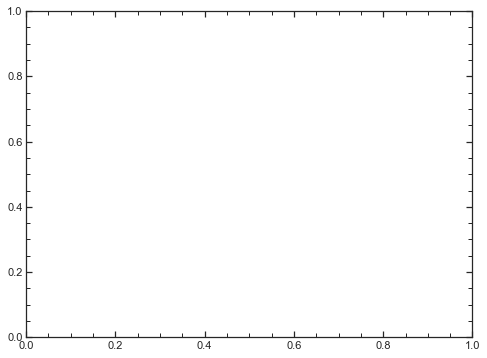

In [25]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.scatter(SWC_range, Depth, color = 'darkblue')
ax.plot(SWC_range, Depth, color = 'darkblue')
fig.tight_layout()